# Titanic Dataset - Exploratory Data Analysis (EDA)

このノートブックでは、Titanicの訓練データセット（train.csv）を探索的に分析します。

目標:
- データセットの構造と特徴を理解する
- 欠損値のパターンを特定する
- 各特徴量の分布を確認する
- 生存率に影響を与える要因を分析する

## 1. ライブラリのインポートとデータの読み込み

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 設定
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# 日本語フォント設定（MacOS）
plt.rcParams['font.family'] = 'DejaVu Sans'

print("ライブラリのインポート完了")

ライブラリのインポート完了


In [23]:
# データの読み込み
train_df = pd.read_csv('../dbt_project/seeds/train.csv')
print(f"データの読み込み完了: {train_df.shape[0]}行 × {train_df.shape[1]}列")

データの読み込み完了: 891行 × 12列


## 2. データセットの概要

In [24]:
# 最初の5行を表示
print("=== データの最初の5行 ===")
train_df.head()

=== データの最初の5行 ===


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# データ型と欠損値の確認
print("=== データの情報 ===")
train_df.info()

=== データの情報 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
# 基本統計量
print("=== 数値データの基本統計量 ===")
train_df.describe()

=== 数値データの基本統計量 ===


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. 欠損値の分析

In [27]:
# 欠損値の数と割合
missing_data = pd.DataFrame({
    '欠損数': train_df.isnull().sum(),
    '欠損率(%)': (train_df.isnull().sum() / len(train_df) * 100).round(2)
})
missing_data = missing_data[missing_data['欠損数'] > 0].sort_values('欠損数', ascending=False)
print("=== 欠損値の概要 ===")
print(missing_data)

=== 欠損値の概要 ===
          欠損数  欠損率(%)
Cabin     687   77.10
Age       177   19.87
Embarked    2    0.22


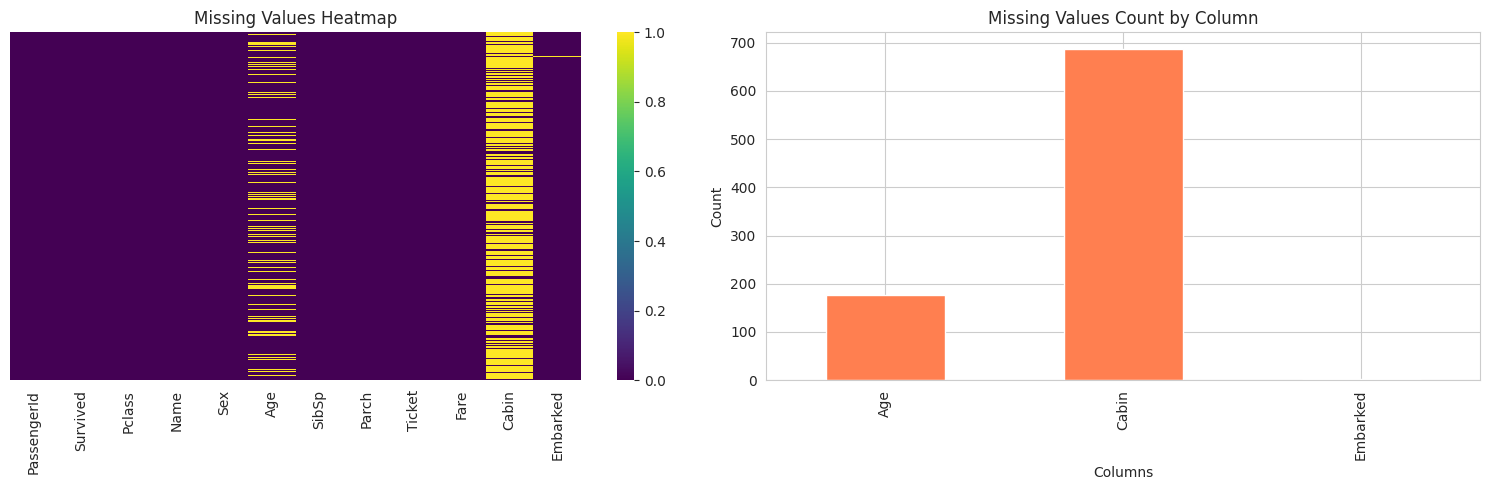

In [28]:
# 欠損値の可視化
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ヒートマップ
sns.heatmap(train_df.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing Values Heatmap')

# 欠損値の棒グラフ
missing_counts = train_df.isnull().sum()[train_df.isnull().sum() > 0]
missing_counts.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Missing Values Count by Column')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Columns')

plt.tight_layout()
plt.show()

## 4. 数値特徴量の分析

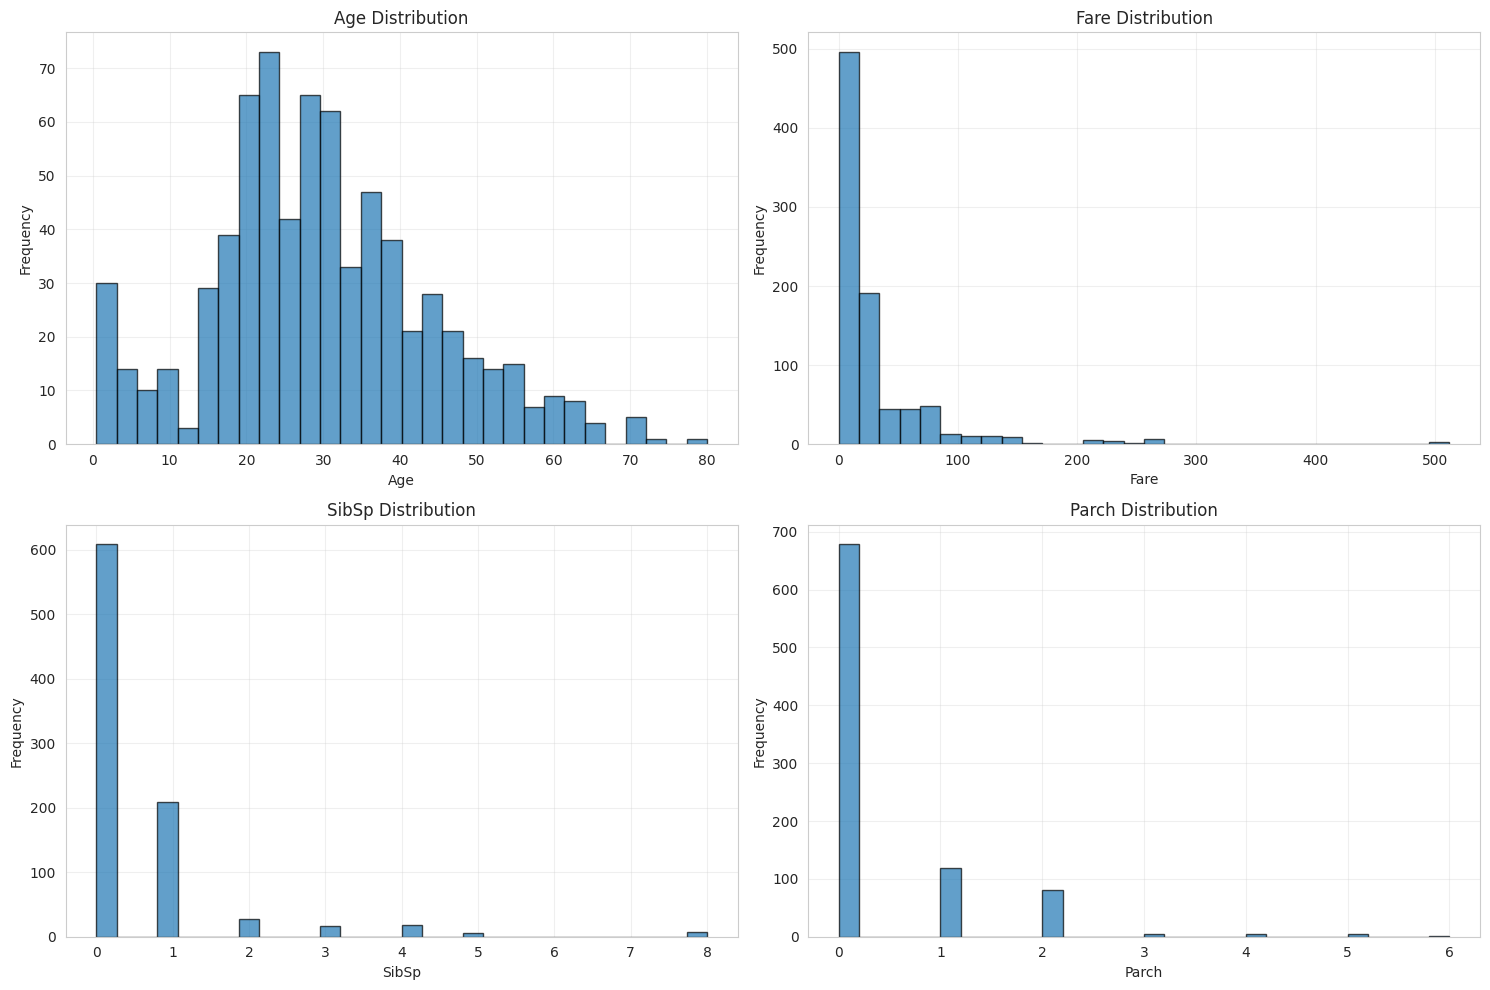

In [29]:
# 主要な数値特徴量のヒストグラム
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    axes[idx].hist(train_df[feature].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature} Distribution')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

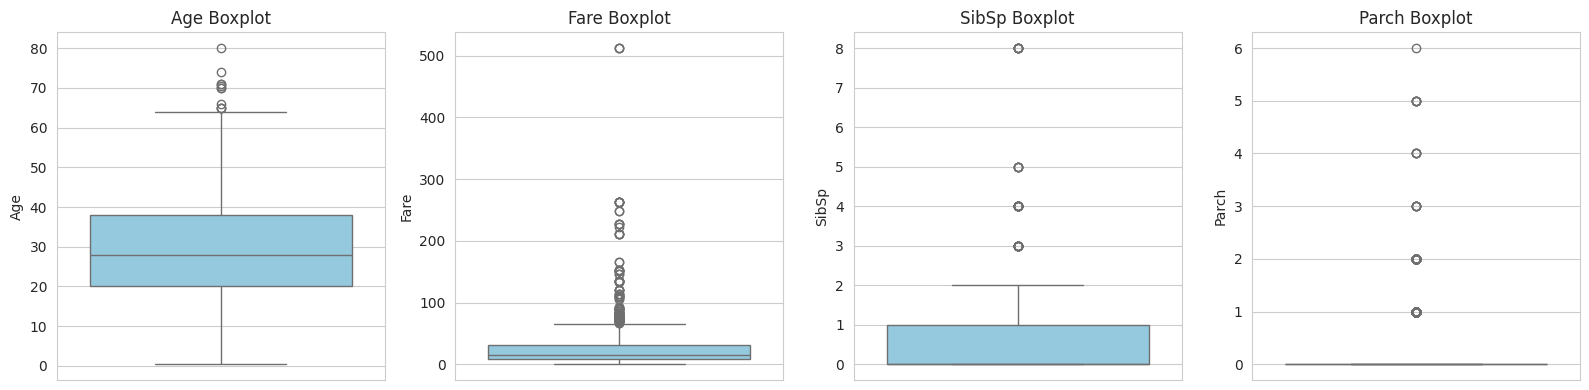

In [30]:
# 箱ひげ図で外れ値を確認
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, feature in enumerate(numerical_features):
    sns.boxplot(y=train_df[feature], ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'{feature} Boxplot')
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

## 5. カテゴリカル特徴量の分析

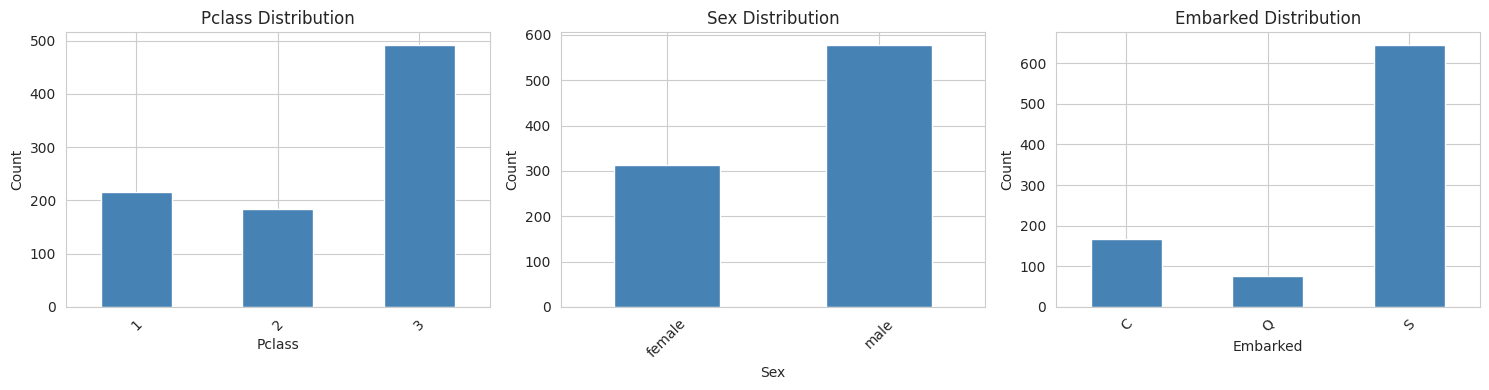

In [31]:
# カテゴリカル特徴量の分布
categorical_features = ['Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, feature in enumerate(categorical_features):
    train_df[feature].value_counts().sort_index().plot(kind='bar', ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'{feature} Distribution')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xlabel(feature)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [32]:
# 各カテゴリカル特徴量の詳細統計
for feature in categorical_features:
    print(f"\n=== {feature} の分布 ===")
    print(train_df[feature].value_counts())
    print(f"\n割合 (%):")
    print(train_df[feature].value_counts(normalize=True) * 100)


=== Pclass の分布 ===
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

割合 (%):
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

=== Sex の分布 ===
Sex
male      577
female    314
Name: count, dtype: int64

割合 (%):
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

=== Embarked の分布 ===
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

割合 (%):
Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64


## 6. 生存率の分析

全体の生存率: 38.38%

生存者数: 342人
死亡者数: 549人


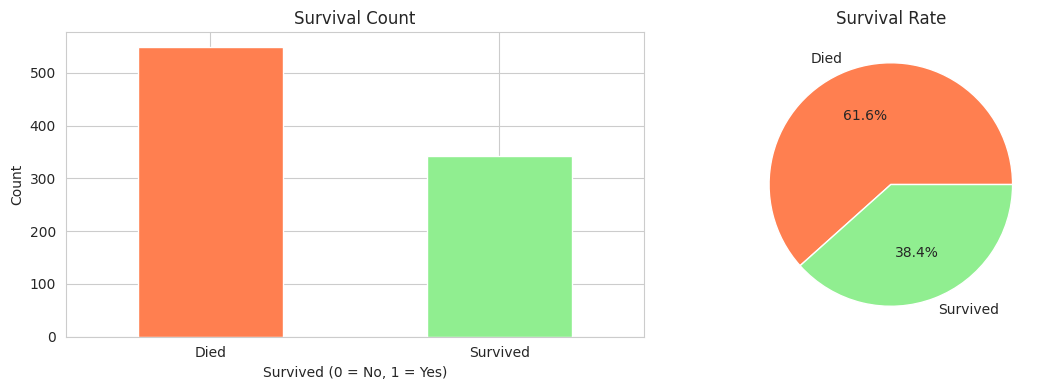

In [33]:
# 全体の生存率
survival_rate = train_df['Survived'].mean() * 100
print(f"全体の生存率: {survival_rate:.2f}%")
print(f"\n生存者数: {train_df['Survived'].sum()}人")
print(f"死亡者数: {(~train_df['Survived'].astype(bool)).sum()}人")

# 生存者の分布
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# カウントプロット
train_df['Survived'].value_counts().plot(kind='bar', ax=axes[0], color=['coral', 'lightgreen'])
axes[0].set_title('Survival Count')
axes[0].set_xlabel('Survived (0 = No, 1 = Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Died', 'Survived'], rotation=0)

# 円グラフ
train_df['Survived'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                          labels=['Died', 'Survived'],
                                          colors=['coral', 'lightgreen'])
axes[1].set_title('Survival Rate')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 7. 特徴量間の関係と相関分析

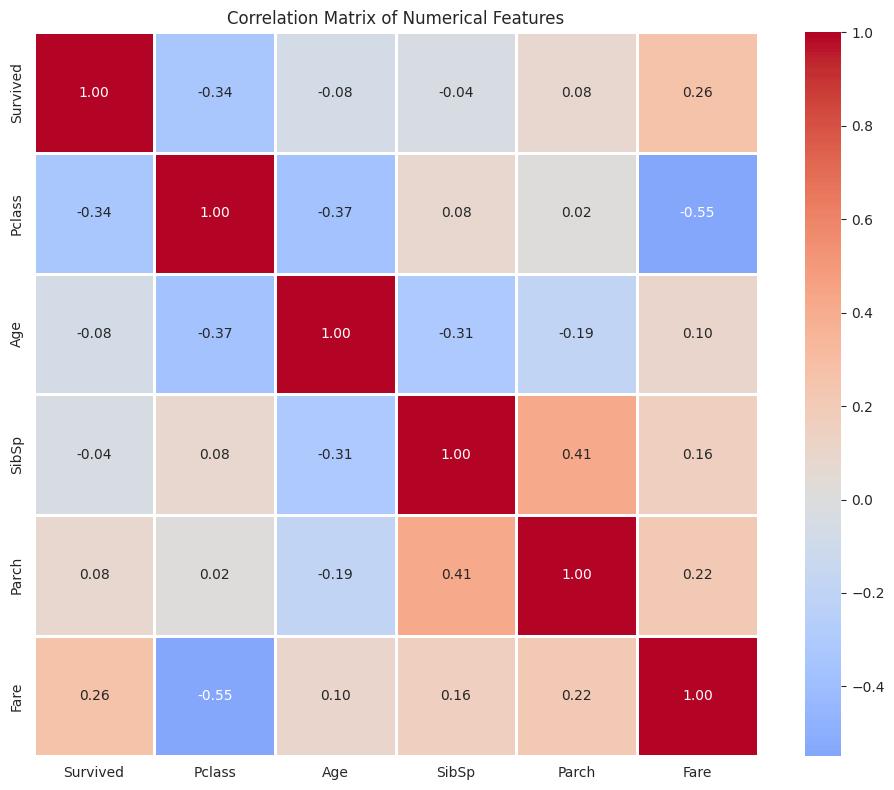


生存率との相関:
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64


In [34]:
# 数値特徴量の相関行列
numeric_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = train_df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print("\n生存率との相関:")
print(correlation_matrix['Survived'].sort_values(ascending=False))

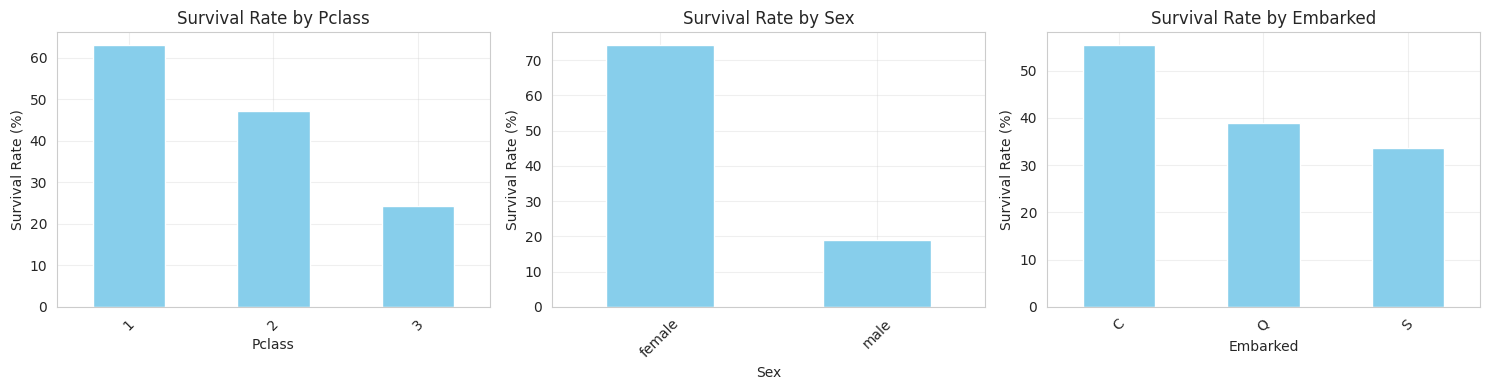

In [35]:
# カテゴリカル特徴量と生存率の関係
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, feature in enumerate(['Pclass', 'Sex', 'Embarked']):
    survival_by_feature = train_df.groupby(feature)['Survived'].mean() * 100
    survival_by_feature.plot(kind='bar', ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Survival Rate by {feature}')
    axes[idx].set_ylabel('Survival Rate (%)')
    axes[idx].set_xlabel(feature)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 8. クラス別・生存状態別の年齢分布

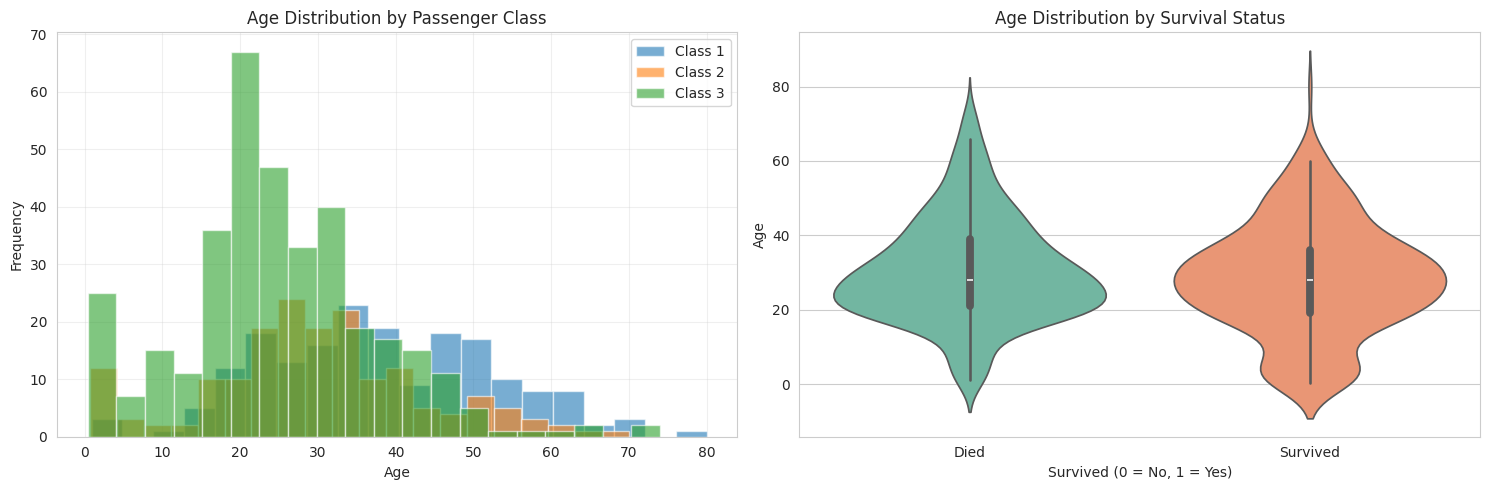

In [36]:
# クラス別の年齢分布
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ヒストグラムによる年齢分布
for pclass in [1, 2, 3]:
    data = train_df[train_df['Pclass'] == pclass]['Age'].dropna()
    axes[0].hist(data, bins=20, alpha=0.6, label=f'Class {pclass}')
axes[0].set_title('Age Distribution by Passenger Class')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(alpha=0.3)

# バイオリンプロットによる生存状態別の年齢分布
sns.violinplot(x='Survived', y='Age', data=train_df, ax=axes[1], palette='Set2')
axes[1].set_title('Age Distribution by Survival Status')
axes[1].set_xlabel('Survived (0 = No, 1 = Yes)')
axes[1].set_ylabel('Age')
axes[1].set_xticklabels(['Died', 'Survived'])

plt.tight_layout()
plt.show()

In [37]:
# クラス別・性別の年齢統計
print("=== クラス別の年齢統計 ===")
print(train_df.groupby('Pclass')['Age'].describe())

print("\n=== 生存状態別の年齢統計 ===")
print(train_df.groupby('Survived')['Age'].describe())

=== クラス別の年齢統計 ===
        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0

=== 生存状態別の年齢統計 ===
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


## 9. 運賃（Fare）の分析

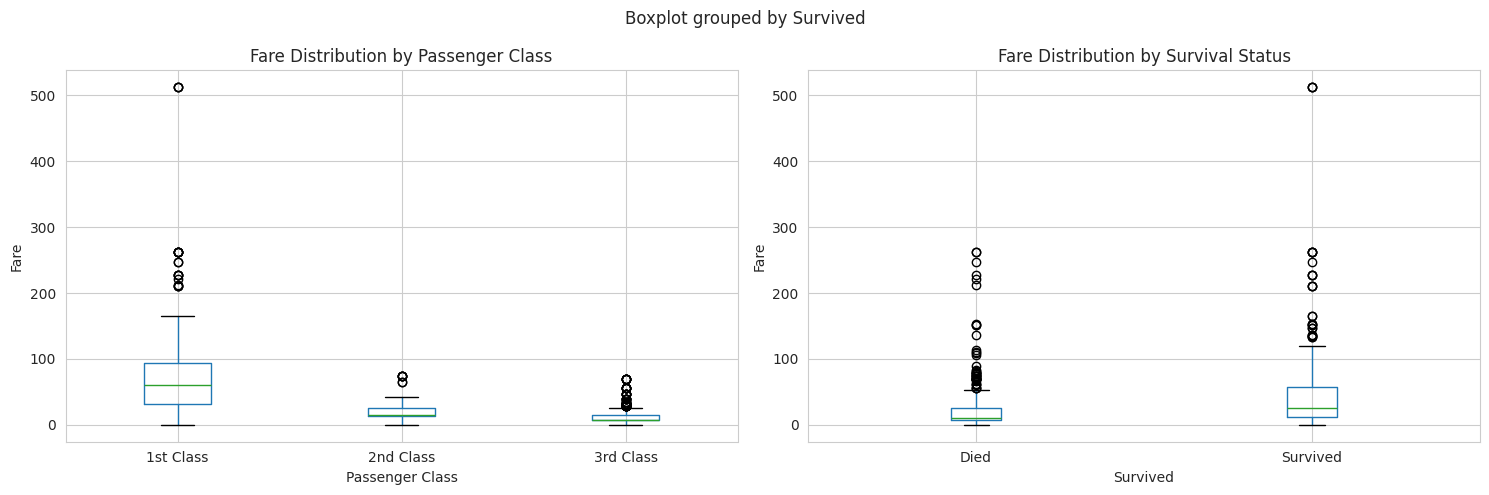

In [38]:
# クラス別・生存状態別の運賃分布
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# クラス別の運賃
train_df.boxplot(column='Fare', by='Pclass', ax=axes[0])
axes[0].set_title('Fare Distribution by Passenger Class')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Fare')
plt.sca(axes[0])
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])

# 生存状態別の運賃
train_df.boxplot(column='Fare', by='Survived', ax=axes[1])
axes[1].set_title('Fare Distribution by Survival Status')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Fare')
plt.sca(axes[1])
plt.xticks([1, 2], ['Died', 'Survived'])

plt.tight_layout()
plt.show()

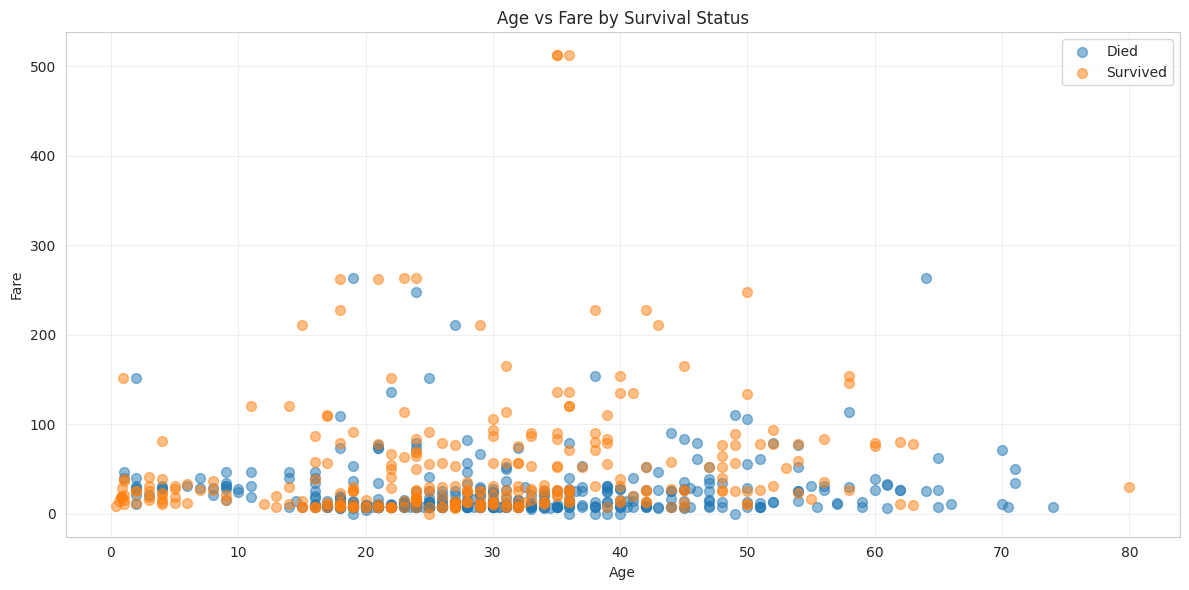

=== クラス別の運賃統計 ===
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500


In [39]:
# 運賃と年齢の散布図（生存状態別）
plt.figure(figsize=(12, 6))
for survived in [0, 1]:
    data = train_df[train_df['Survived'] == survived]
    plt.scatter(data['Age'], data['Fare'], alpha=0.5,
                label='Survived' if survived == 1 else 'Died', s=50)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Survival Status')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("=== クラス別の運賃統計 ===")
print(train_df.groupby('Pclass')['Fare'].describe())

## 10. 乗船港（Embarked）の分析

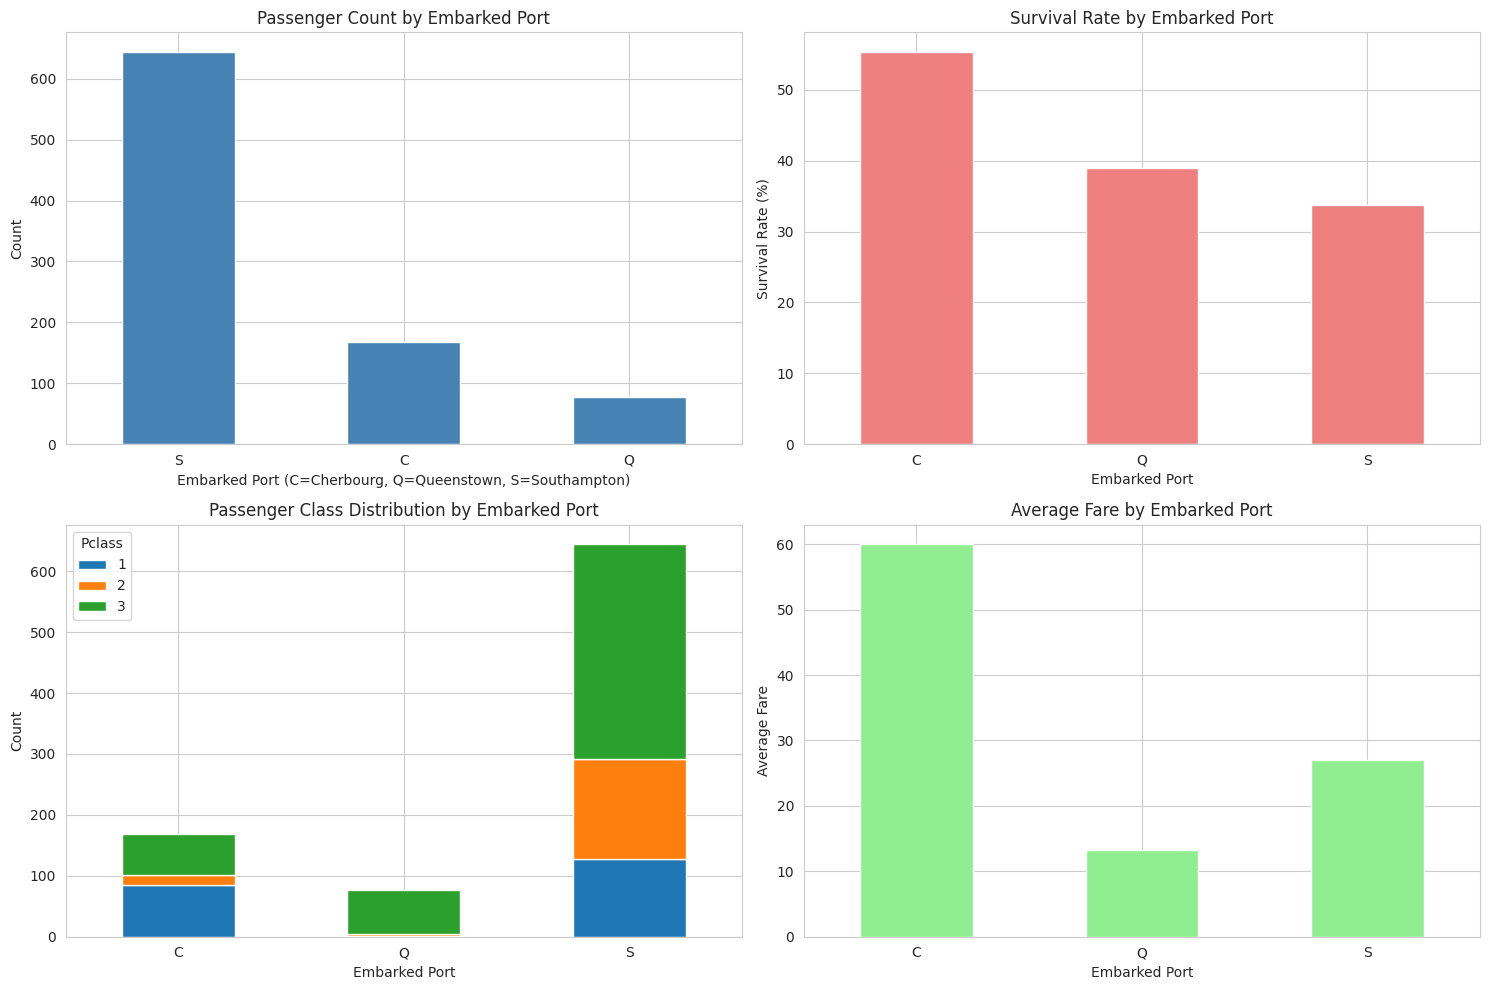

In [40]:
# 乗船港別の統計
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 乗船港別の人数
embarked_counts = train_df['Embarked'].value_counts()
embarked_counts.plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Passenger Count by Embarked Port')
axes[0, 0].set_xlabel('Embarked Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)

# 乗船港別の生存率
survival_by_embarked = train_df.groupby('Embarked')['Survived'].mean() * 100
survival_by_embarked.plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Survival Rate by Embarked Port')
axes[0, 1].set_xlabel('Embarked Port')
axes[0, 1].set_ylabel('Survival Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=0)

# 乗船港別のクラス分布
pd.crosstab(train_df['Embarked'], train_df['Pclass']).plot(kind='bar', ax=axes[1, 0], stacked=True)
axes[1, 0].set_title('Passenger Class Distribution by Embarked Port')
axes[1, 0].set_xlabel('Embarked Port')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Pclass')
axes[1, 0].tick_params(axis='x', rotation=0)

# 乗船港別の平均運賃
avg_fare_by_embarked = train_df.groupby('Embarked')['Fare'].mean()
avg_fare_by_embarked.plot(kind='bar', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Average Fare by Embarked Port')
axes[1, 1].set_xlabel('Embarked Port')
axes[1, 1].set_ylabel('Average Fare')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [41]:
# 乗船港別の詳細統計
print("=== 乗船港別の統計 ===")
print("\n人数:")
print(train_df['Embarked'].value_counts())

print("\n生存率 (%):")
print(train_df.groupby('Embarked')['Survived'].mean() * 100)

print("\n平均運賃:")
print(train_df.groupby('Embarked')['Fare'].mean())

print("\n平均年齢:")
print(train_df.groupby('Embarked')['Age'].mean())

=== 乗船港別の統計 ===

人数:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

生存率 (%):
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

平均運賃:
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

平均年齢:
Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64


## まとめ

このEDAを通じて以下のことがわかりました：

### 主要な発見:
1. **欠損値**: Age（約20%）、Cabin（約77%）、Embarked（2件）に欠損値が存在
2. **全体の生存率**: 約38%
3. **性別**: 女性の生存率が男性よりも大幅に高い
4. **客室クラス**: 上位クラス（1st Class）の生存率が高い
5. **年齢**: 子供（特に幼児）の生存率が高い傾向
6. **運賃**: 高い運賃を支払った乗客ほど生存率が高い
7. **乗船港**: Cherbourgから乗船した乗客の生存率がやや高い
8. **家族関係**: SibSp（兄弟姉妹・配偶者）とParch（両親・子供）の数も生存に影響

### 次のステップ:
- 欠損値の補完
- 特徴量エンジニアリング（家族サイズ、年齢グループ化など）
- モデリングの準備